# Ejercicio práctico de NeuralProphet 

In [28]:
#!pip install neuralprophet
#!pip install neuralprophet[live]

### Importación de librerías y datos

In [29]:
from neuralprophet import NeuralProphet

In [30]:
from neuralprophet import set_random_seed 
set_random_seed(0)

In [31]:
import pandas as pd
df = pd.read_csv('dataset/example_wp_log_peyton_manning.csv')

In [32]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


### Transformación de datos

In [33]:
df['ds'] = pd.to_datetime(df['ds'])

### Entrenamiento del modelo

In [34]:
m = NeuralProphet()
metrics = m.fit(df, freq="D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 22


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[22/22]: 100%|█████████████████████████| 22/22 [00:10<00:00,  2.01it/s, SmoothL1Loss=0.00536, MAE=0.36, RegLoss=0]


### Predicción de datos

In [35]:
future = m.make_future_dataframe(df, periods=365)
forecast = m.predict(future)

### Visualización de resultados

C:\Users\Leyre\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Leyre\anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


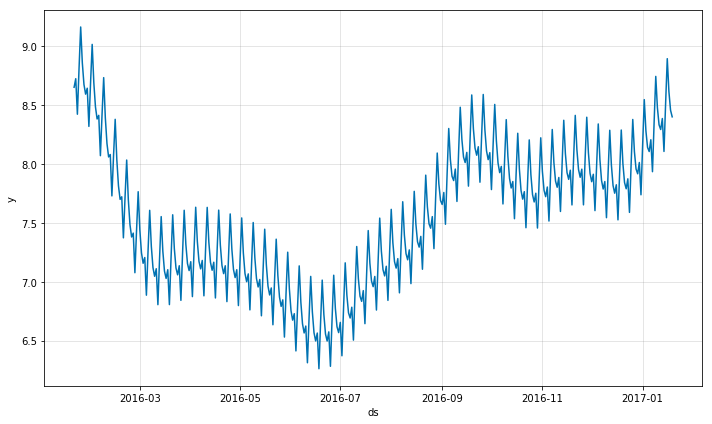

In [36]:
forecasts_plot = m.plot(forecast)

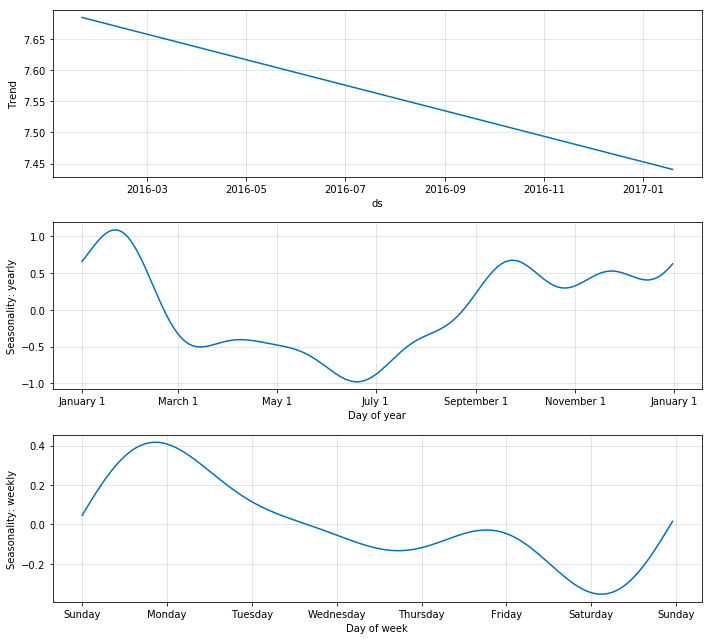

In [37]:
fig_comp = m.plot_components(forecast)

### Validación del modelo

In [38]:
m = NeuralProphet()
df_train, df_val = m.split_df(df, valid_p=0.2)

In [42]:
train_metrics = m.fit(df_train,freq=0.7)
val_metrics = m.test(df_val)
val_metrics

Epoch[27/27]: 100%|████████████████████████| 27/27 [00:08<00:00,  3.08it/s, SmoothL1Loss=0.00537, MAE=0.365, RegLoss=0]
INFO: nprophet - _evaluate: Validation metrics:    SmoothL1Loss    MAE
1         0.004  0.329


,SmoothL1Loss,MAE
0,0.004355,0.328992
